<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised Machine Learning

In [4]:
# Import collection of available datasets
from sklearn import datasets


In [5]:
# Load the wine dataset and ask for its description (DESCR)

wine = datasets.load_wine()

print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
print(wine.target_names)
print(wine.feature_names)


['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### Analyzing the Iris dataset

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Iris dataset from Scikit-Learn 
from sklearn.datasets import load_iris
iris_dataset = load_iris()


In [7]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print(iris_dataset['DESCR'][:600] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
          
...


In [14]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [15]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [17]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [18]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [20]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [21]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Creating Training and Test Data**


In [3]:
# Import the train_test_split function from sklearn.model_selection 
# Use: train_test_split(X, y, test_size=0.3, random_state=41), use 30% of data as test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=41)


In [4]:
# Splitting data result
# Train data size

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (105, 4)
y_train shape: (105,)


In [5]:
# Tests data size

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (45, 4)
y_test shape: (45,)


In [6]:
# Will use mglearn library for illustration purposes. 

# Install the mglearn library for Python on Google Colab
# See: https://pypi.org/project/mglearn/

!pip install mglearn


     |████████████████████████████████| 540 kB 10.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=77a0130be0dd5a7ae1fdd213f26594d49b3c7df7c82031de3dbc327b43d914e8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


**Visualize data**


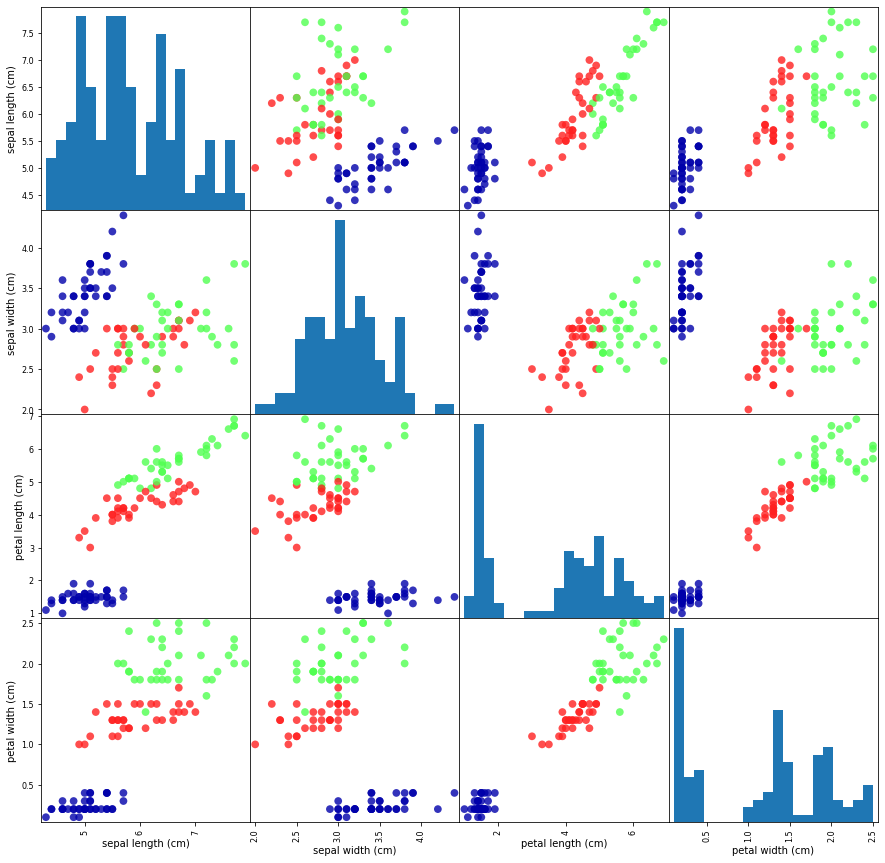

In [7]:
# Will use mglearn to use a color map 

import mglearn

# create DataFrame from data in X_train and 
# label the columns using the strings in iris_dataset.feature_names

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3);


**Building a First Model: k-Nearest Neighbors**


In [8]:
# We import the K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the Algorithm
knn = KNeighborsClassifier(n_neighbors=1)


In [9]:
# Fit the model to train data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

**Making predictions**


In [10]:
# Define a new data value unseen by the model

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)


X_new.shape: (1, 4)


**Evaluating the model**


In [11]:
# Predict to what class will the new value belong

prediction = knn.predict(X_new)

print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])


Prediction: [0]
Predicted target name: ['setosa']


In [12]:
# Predict y values using test values X_test

y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)


Test set predictions:
 [1 2 2 1 2 1 2 1 2 2 2 0 0 1 0 1 0 2 0 0 1 2 0 0 1 1 1 1 0 1 1 1 1 1 2 0 2
 1 2 2 1 1 0 2 2]


In [13]:
# Now see the performance of the model predicting y values compared to known test values

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set score: 0.89


In [14]:
# Print model performance using the score function

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set score: 0.89


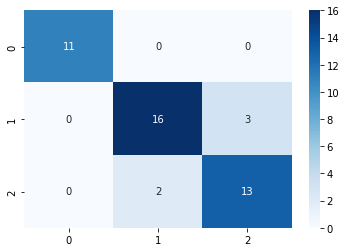

In [15]:
# Import Confusion Matrix
from sklearn.metrics import confusion_matrix 
import seaborn as sns

# Evaluate Model
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap='Blues');


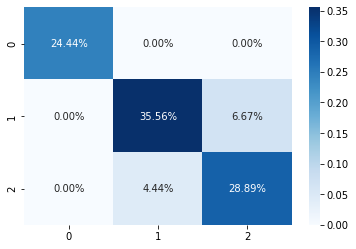

In [16]:
# Annotated & Normalized Heat Map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues');


In [17]:
# Print performance metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.84      0.89      0.86        18
           2       0.87      0.81      0.84        16

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45



**In summary: KNeighbors Classifier**

Test set score: 0.89
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      0.94      0.89        18
           2       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



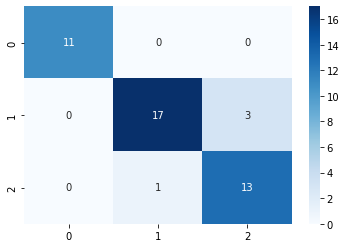

In [24]:
# Import frequent needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries from Scikit-Learn for Classification problems
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Load Iris dataset from Scikit-Learn 
from sklearn.datasets import load_iris
iris_dataset = load_iris()


# Simple steps for building a machine learning model

# Step 1: Split data intro (70%)train and (30%) test sets.
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=41)

# Instantiate the model and train it by fitting the train data.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# See the performance of the model 
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Evaluate Model
cm = confusion_matrix(y_pred, y_test)

# Annotated & Normalized Heat Map
#sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues');
sns.heatmap(cm, annot=True, cmap='Blues');

# Print performance metrics
print(classification_report(y_test, y_pred))

### Trying with other classifiers. 
Introducing also the following concepts and methods:
* [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html), 
* [Hyperparameter tuning](https://scikit-learn.org/stable/modules/grid_search.html), 
* [Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) and 
* [Pipelines](https://scikit-learn.org/stable/modules/compose.html#combining-estimators) as means of combining various steps.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n

Tuned DecisionTree params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 5}
Best score is: 0.9714285714285713
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      0.94      0.89        18
           2       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



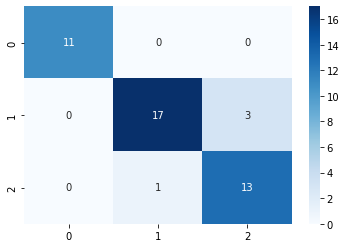

In [26]:
# DecisionTreeClassifier

# Import frequent needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Import libraries from Scikit-Learn for Classification problems
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load Iris dataset from Scikit-Learn 
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Step 1: Split data intro (70%)train and (30%) test sets.
X = iris_dataset['data']
y = iris_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=41)

# Simple steps for building a machine learning model

# Define a grid in hyperparameter space
param_dist = { 'max_depth': [3, None],
              'max_features' : randint(1,9),
              'min_samples_leaf' : randint(1,9),
              'criterion' : ['gini', 'entropy']}

# Instantiate the model 
tree = DecisionTreeClassifier()

# Instantiate the RandomSearchCV
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit model to data
tree_cv.fit(X_train, y_train)

# See the performance of the model 
print("Tuned DecisionTree params: {}".format(tree_cv.best_params_))
print("Best score is: {}".format(tree_cv.best_score_))

y_pred = tree_cv.predict(X_test)

# Evaluate Model
cm = confusion_matrix(y_pred, y_test)

# Annotated & Normalized Heat Map
#sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues');
sns.heatmap(cm, annot=True, cmap='Blues');

# Print performance metrics
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned LogisticRegression params: {'C': 117.8768634793589, 'penalty': 'l2'}
Tunned LogisticRegression Accuracy is: 0.9619047619047618
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



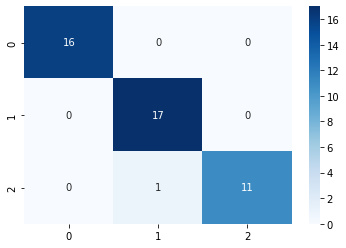

In [41]:
# Logistic Regression Classifier

# Import frequent needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Import libraries from Scikit-Learn for Classification problems
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load Iris dataset from Scikit-Learn 
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Step 1: Split data intro (70%)train and (30%) test sets.
X = iris_dataset['data']
y = iris_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  test_size=0.3, random_state=0)

# Simple steps for building a machine learning model

# Define a grid in hyperparameter space
c_space = np.logspace(-5,4,15)
param_grid = {'C' : c_space, 'penalty' : ['l1', 'l2']}

# Instantiate the model 
logreg = LogisticRegression()

# Instantiate the GridSearchCV
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)


# Fit model to data
logreg_cv.fit(X_train, y_train)

# See the performance of the model 
print("Tuned LogisticRegression params: {}".format(logreg_cv.best_params_))
print("Tunned LogisticRegression Accuracy is: {}".format(logreg_cv.best_score_))

y_pred = logreg_cv.predict(X_test)

# Evaluate Model
cm = confusion_matrix(y_pred, y_test)

# Annotated & Normalized Heat Map
#sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues');
sns.heatmap(cm, annot=True, cmap='Blues');

# Print performance metrics
print(classification_report(y_test, y_pred))


In [44]:
# ElasticNet Classifier

# Import frequent needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Import libraries from Scikit-Learn for Classification problems
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report

# Load Iris dataset from Scikit-Learn 
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Step 1: Split data intro (70%)train and (30%) test sets.
X = iris_dataset['data']
y = iris_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  test_size=0.3, random_state=0)

# Simple steps for building a machine learning model

# Define a grid in hyperparameter space
l1_space = np.linspace(0,1,30)
param_grid = {'l1_ratio' : l1_space}

# Instantiate the model 
elastic_net = ElasticNet()

# Instantiate the GridSearchCV
elnet_cv = GridSearchCV(elastic_net, param_grid, cv=5)


# Fit model to data
elnet_cv.fit(X_train, y_train)


y_pred = elnet_cv.predict(X_test)
r2 = elnet_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

# See the performance of the model 
print("Tuned ElasticNet params: {}".format(elnet_cv.best_params_))
print("R squared: {}".format(r2))
print("Mean squared error: {}".format(mse))


# Evaluate Model
#cm = confusion_matrix(y_pred, y_test)

# Annotated & Normalized Heat Map
#sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues');
#sns.heatmap(cm, annot=True, cmap='Blues');

# Print performance metrics
#print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.942e+00, tolerance: 6.070e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.707e+00, tolerance: 5.781e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

Tuned ElasticNet params: {'l1_ratio': 0.0}
R squared: 0.8486899437270021
Mean squared error: 0.08891800837771234


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.484e+00, tolerance: 7.276e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [53]:
# Scaling in a Pipeline

# Import frequent needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Import libraries from Scikit-Learn for Classification problems
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score

# Load Iris dataset from Scikit-Learn 
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Step 1: Split data intro (70%)train and (30%) test sets.
X = iris_dataset['data']
y = iris_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  test_size=0.3, random_state=0)

# Simple steps for building a machine learning model
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

# Instantiate and fit the model
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy score (scaled): {}".format(accuracy_score(y_test, y_pred)))

# Instantiate and fit the model without scaling
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)


print("Accuracy score (unscaled): {}".format(knn_unscaled.score(X_test, y_test)))



Accuracy score (scaled): 0.9777777777777777
Accuracy score (unscaled): 0.9777777777777777


Best parameters: {'knn__n_neighbors': 3}
Score: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



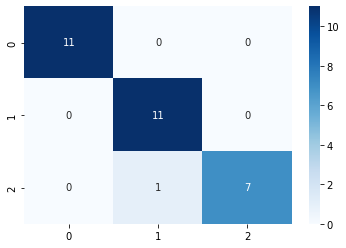

In [76]:
# Cross validation, scaling and hyperparameter tuning in a pipeline

# Scaling in a Pipeline

# Import frequent needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Import libraries from Scikit-Learn for Classification problems
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load Iris dataset from Scikit-Learn 
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Step 1: Split data intro (70%)train and (30%) test sets.
X = iris_dataset['data']
y = iris_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  test_size=0.2, random_state=21)

#neighbors = np.arange(1, 16)
neighbors = list(range(1, 16))
param_grid = dict(knn__n_neighbors=neighbors)

# Simple steps for building a machine learning model
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)


# Instantiate and fit the model
cv = GridSearchCV(pipeline, param_grid)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Best parameters: {}".format(cv.best_params_))
print("Score: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


# Evaluate Model
cm = confusion_matrix(y_pred, y_test)

# Annotated & Normalized Heat Map
#sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues');
sns.heatmap(cm, annot=True, cmap='Blues');


**Exercise:** Can you do a similar analysis with the [Penguins dataset](https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv)?




In [68]:
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

**More datasets**

X.shape: (26, 2)


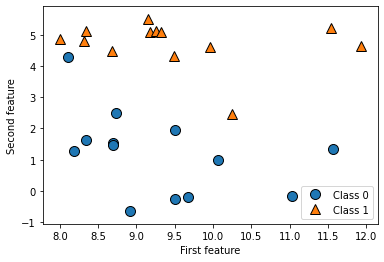

In [60]:
import warnings
warnings.filterwarnings("ignore")

# Generate a dataset

# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)


### K-Nearest Neighbors

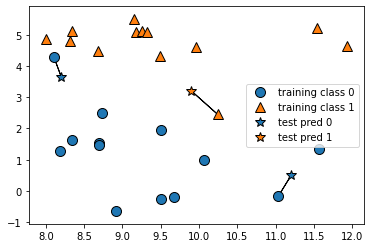

In [61]:
mglearn.plots.plot_knn_classification(n_neighbors=1)


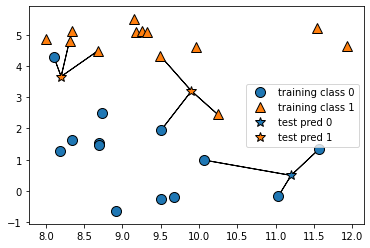

In [62]:
mglearn.plots.plot_knn_classification(n_neighbors=3)


In [63]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)


In [65]:
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [66]:
print("Test set predictions:", clf.predict(X_test))


Test set predictions: [1 0 1 1 0 1 0 0]


In [67]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.88


**Analizing the K-Neighbors Classifier**


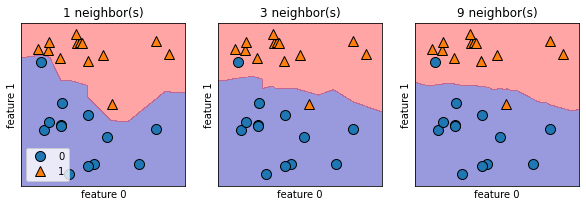

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3);


**How do we decide the number of n_neighbors?**


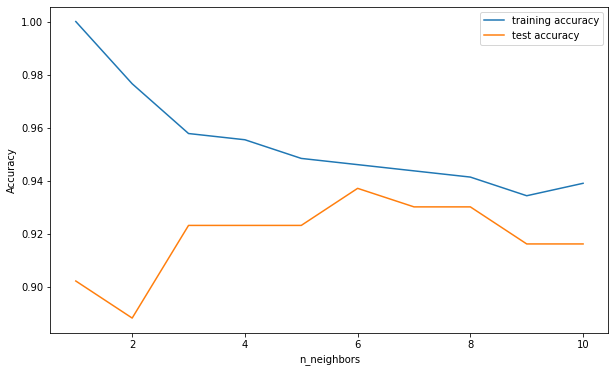

In [74]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.25, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();


## Linear Models for Classification



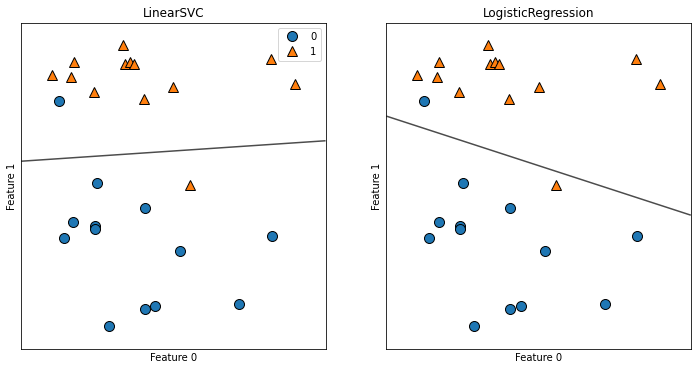

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();


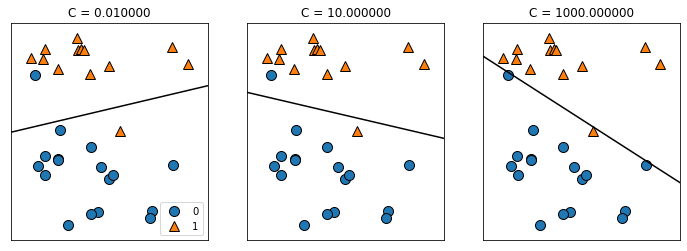

In [76]:
mglearn.plots.plot_linear_svc_regularization()


In [77]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.25, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.955
Test set score: 0.951


In [78]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


Training set score: 0.953
Test set score: 0.965


In [79]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))


Training set score: 0.934
Test set score: 0.930


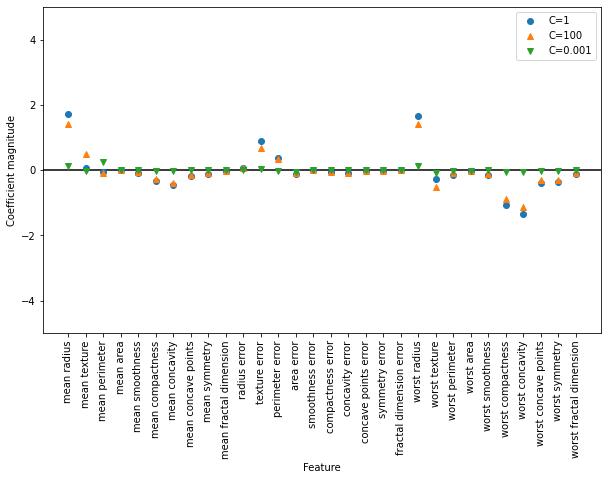

In [80]:
# Plot scores for each feature
plt.figure(figsize=(10, 6))  
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend();


## Linear models for multilabel classification


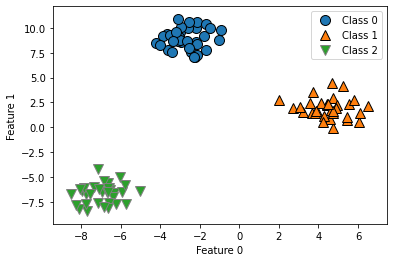

<Figure size 720x432 with 0 Axes>

In [85]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.figure(figsize=(10, 6))
plt.show();


In [86]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)


Coefficient shape:  (3, 2)
Intercept shape:  (3,)


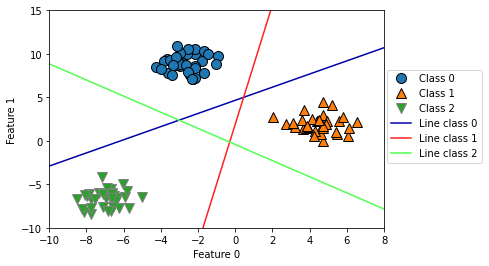

<Figure size 720x432 with 0 Axes>

In [88]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.figure(figsize=(10, 6))
plt.show();




Text(0, 0.5, 'Feature 1')

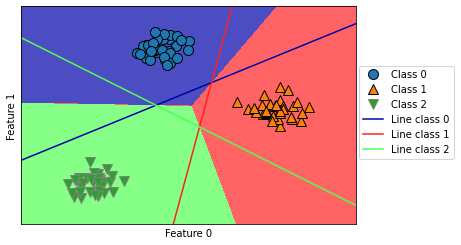

In [89]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


**strength, weakness and parameters**


In [90]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)


In [91]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)


In [92]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

## Decision Trees

In [93]:
import sys
sys.path


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

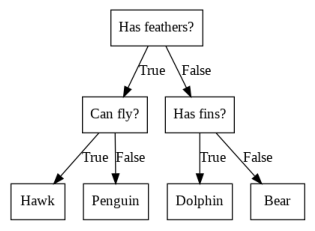

In [94]:
# Example of a Decision Tree
mglearn.plots.plot_animal_tree()


**Building Decision Trees**

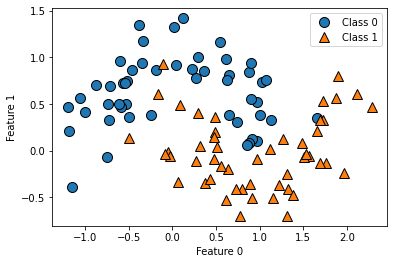

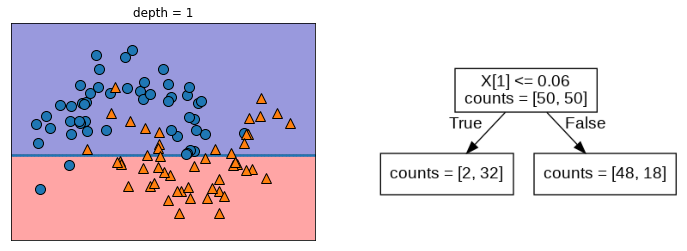

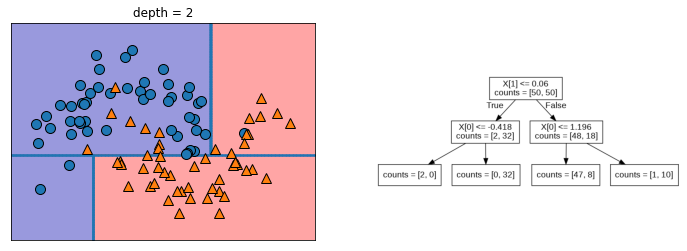

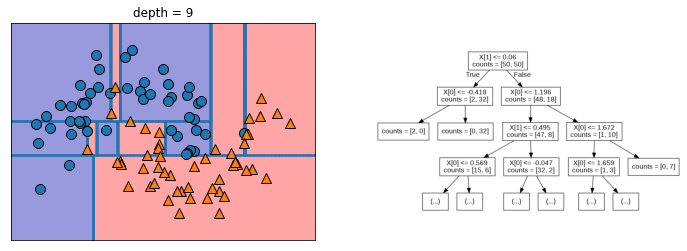

In [95]:
mglearn.plots.plot_tree_progressive()


Controlling complexity of Decision Trees


In [96]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [97]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951
